### 1. Pruebas para confirmar agregaciones

In [3]:
import pandas as pd
file_path = "data/MPDataset_MPDS2024a.csv"
df = pd.read_csv(file_path)

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_5753/53203908.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the DataFrame
df.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.60,1.9,1.900,0.0,1.900,2024a,JN1LZH
1,11,Sweden,0,0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.80,3.3,2.200,33.4,5.600,2024a,CMR7F6
2,11,Sweden,0,0,17/09/1944,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.50,3.2,6.400,14.3,1.600,2024a,Z6OL6C
3,11,Sweden,0,0,17/09/1944,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.00,1.8,22.800,10.6,0.000,2024a,YMKVN2
4,11,Sweden,0,0,17/09/1944,194409,11810,Agrarian Party,NaN,80,...,NaN,NaN,NaN,23.81,0.0,19.048,0.0,4.762,2024a,U4SCRD


#### Crear campo 'agno' para registrar el año del programa

In [5]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
print(unique_agno_values)

[1944 1948 1952 1956 1958 1960 1964 1968 1970 1973 1976 1979 1982 1985
 1988 1991 1994 1998 2002 2006 2010 2014 2018 2022 1945 1949 1953 1957
 1961 1965 1969 1977 1981 1989 1993 1997 2001 2005 2009 2013 2017 1947
 1950 1966 1971 1975 1984 1987 1990 2007 2011 2015 2019 1951 1954 1962
 1972 1983 1995 1999 2003 1946 1959 1963 1967 1974 1978 2016 2021 1986
 2012 2004 1992 1996 2008 2000 1980 1955 1921 1925 1929 1933 1938 2020
 1920 1924 1928 1932 1936 1940 2023]


In [6]:
df.describe()

,country,oecdmember,eumember,date,agno,party,parfam,coderid,manual,coderyear,...,per608_1,per608_2,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace
count,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,4810.000000,...,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,5065.000000,5065.000000,5065.000000,5065.000000,5065.000000
mean,60.689575,5.773636,4.581635,199318.376043,1993.111629,61166.017472,50.703553,288.937488,196.801010,2001.441580,...,0.120638,0.257258,0.010908,2.880598,0.038634,-3.196794,3.721999,3.973368,12.418919,1.921329
std,40.843159,4.940266,5.850457,2055.179044,20.552792,40821.513592,51.417443,220.412273,394.853044,13.620209,...,0.603075,1.040357,0.120679,3.486661,0.293075,22.304397,4.083183,5.469101,8.057894,3.937814
min,11.000000,0.000000,0.000000,192011.000000,1920.000000,11110.000000,10.000000,101.000000,0.000000,1980.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-74.300000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,198010.000000,1980.000000,31220.000000,30.000000,117.000000,1.000000,1991.000000,...,0.000000,0.000000,0.000000,0.693000,0.000000,-18.063000,0.813000,0.420000,6.719000,0.000000
50%,61.000000,10.000000,0.000000,199611.000000,1996.000000,61320.000000,40.000000,248.000000,4.000000,2000.000000,...,0.000000,0.000000,0.000000,2.035000,0.000000,-4.500000,2.695000,2.169000,11.218000,0.559000
75%,84.000000,10.000000,10.000000,201006.000000,2010.000000,84447.500000,60.000000,314.000000,5.000000,2015.000000,...,0.000000,0.000000,0.000000,3.896000,0.000000,9.366000,5.300000,5.208000,16.937000,2.083000
max,181.000000,10.000000,20.000000,202306.000000,2023.000000,181980.000000,999.000000,999.000000,999.000000,2024.000000,...,10.204000,13.861000,2.222000,55.556000,4.678000,91.892000,74.300000,68.500000,70.732000,72.222000


In [10]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [14]:
# Identify all 'perxxxx' columns in df based on df_AD's 'Variable_per'
per_columns = df_AD['Variable_per'].tolist()

# Filter `perxxxx` columns that exist in `df`
valid_per_columns = [col for col in per_columns if col in df.columns]

# Ensure that `agno` column exists, or add a placeholder if not already in `df`
if 'agno' not in df.columns:
    df['agno'] = pd.to_datetime(df['edate'], errors='coerce').dt.year  # Create 'agno' from 'edate'

# Group by `countryname` and `agno` and sum the `perxxxx` columns
df_grouped = df.groupby(['countryname', 'agno'])[valid_per_columns].sum().reset_index()

# Display the resulting dataframe (you can use df_grouped.to_csv or other methods to save it)
df_grouped.head()


,countryname,agno,per101,per102,per103,per104,per105,per106,per107,per108,...,per706,per2033,per4011,per4012,per4123,per4124,per5061,per201_1,per201_2,per202_1
0,Albania,1991,6.282,0.0,2.655,9.957,1.421,5.668,23.541,15.549,...,107.458,0.0,14.361,0.0,0.000,0.0,0.000,0.0,0.0,0.0
1,Albania,1992,4.607,0.0,0.000,7.575,1.466,1.506,32.794,14.898,...,33.502,0.0,11.904,0.0,0.000,0.0,0.000,0.0,0.0,0.0
2,Albania,1996,15.248,0.0,0.917,4.513,0.552,2.175,8.259,4.941,...,16.524,0.0,15.181,0.0,1.405,0.0,0.856,0.0,0.0,0.0
3,Albania,1997,9.309,0.0,0.917,11.569,0.552,1.229,22.162,7.945,...,17.188,0.0,14.911,0.0,2.370,0.0,0.000,0.0,0.0,0.0
4,Albania,2001,5.310,0.0,0.000,4.604,0.552,0.403,11.280,3.659,...,13.882,0.0,6.624,0.0,2.370,0.0,0.000,0.0,0.0,0.0


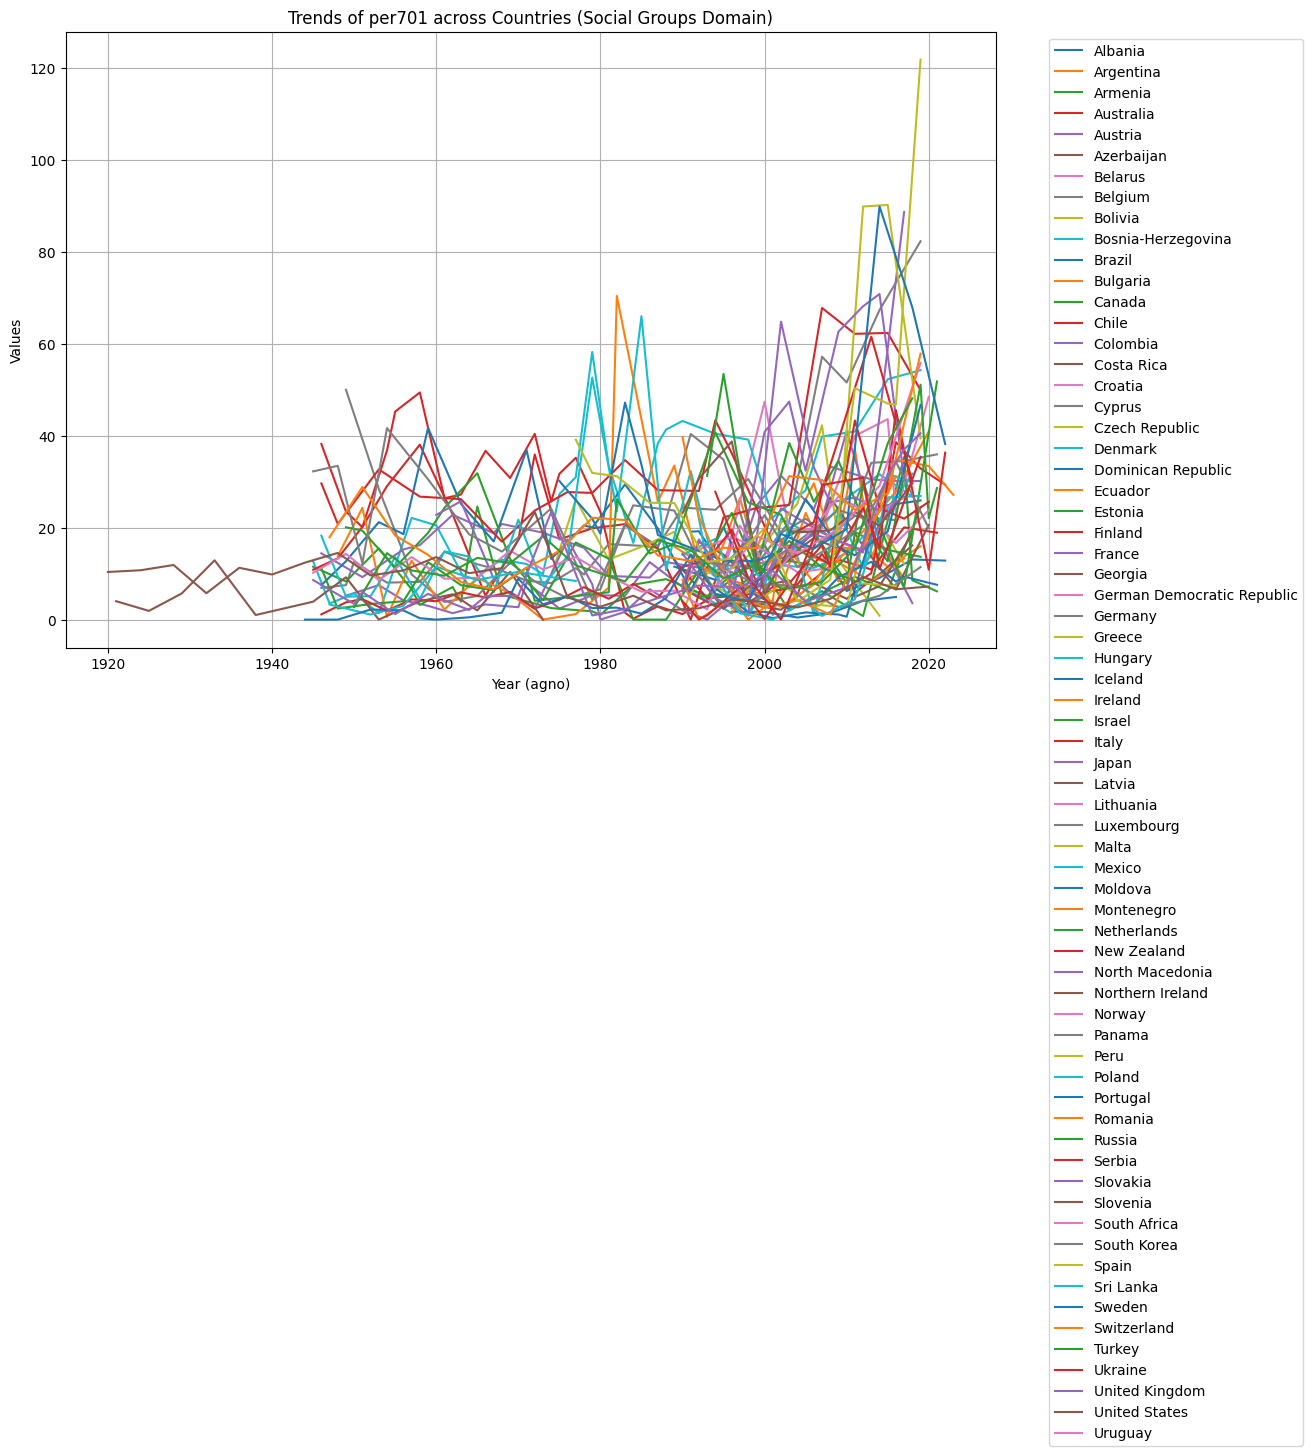

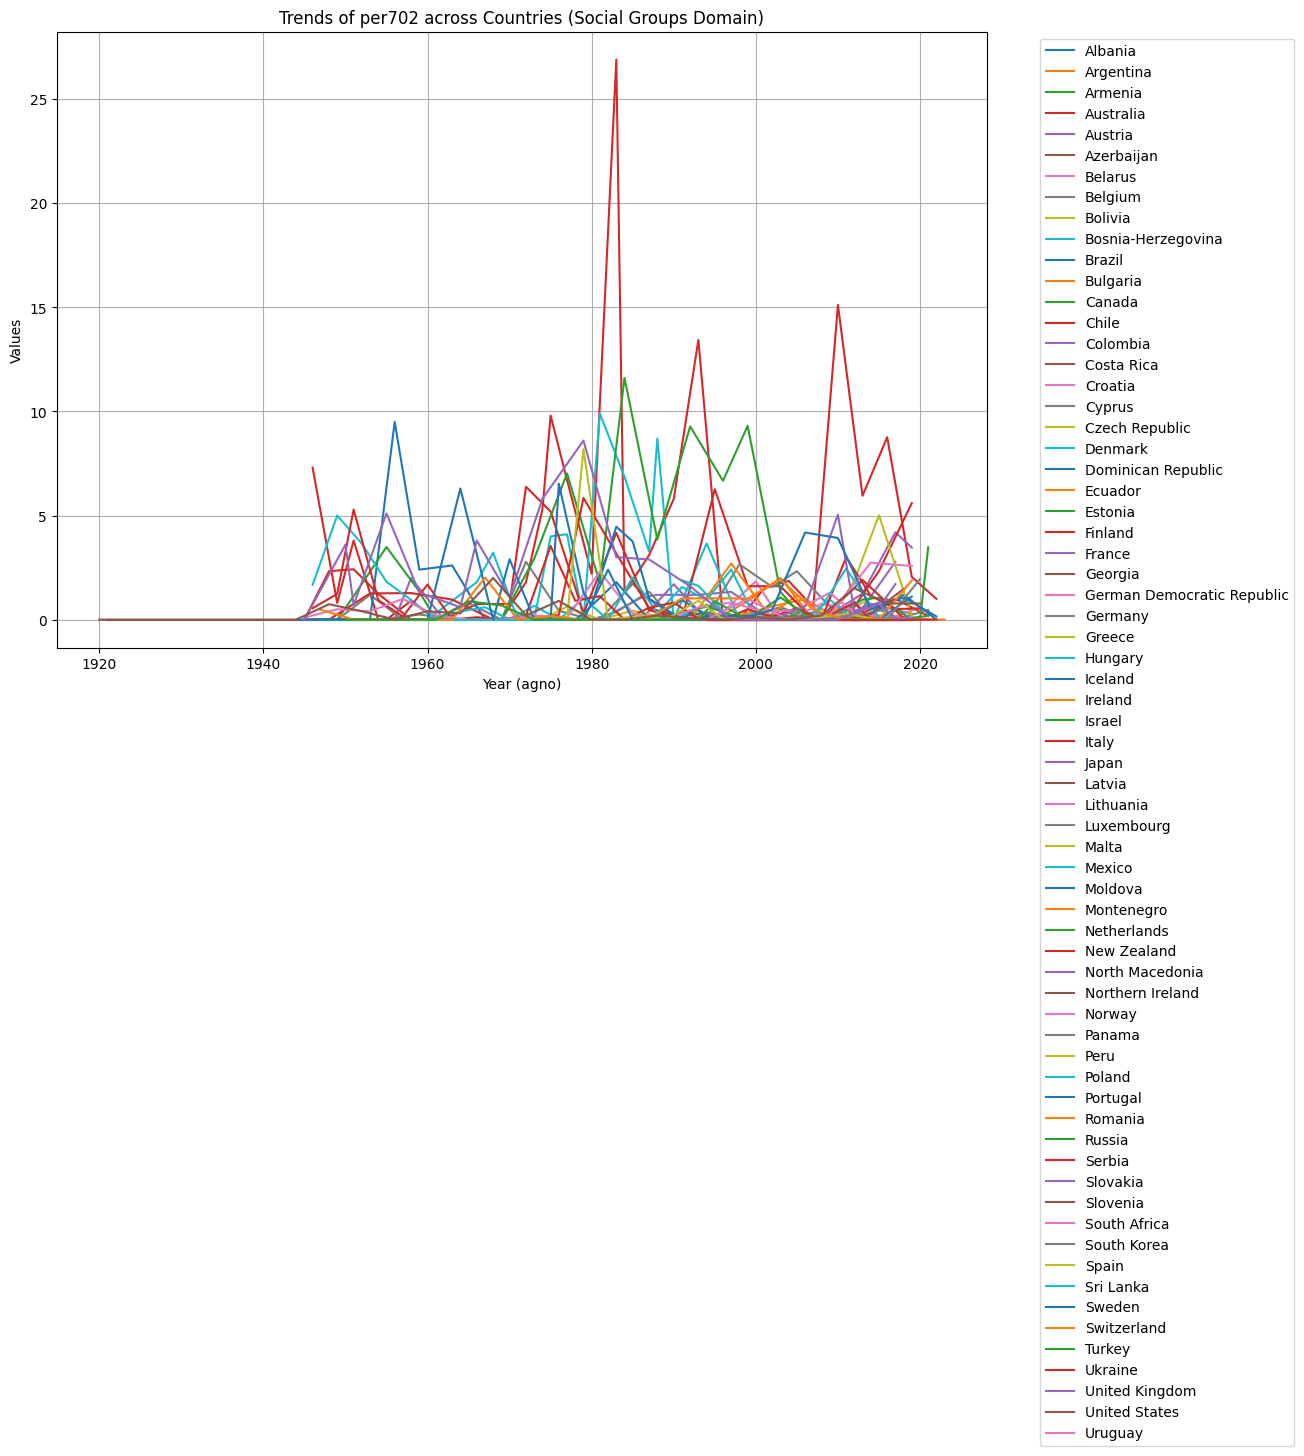

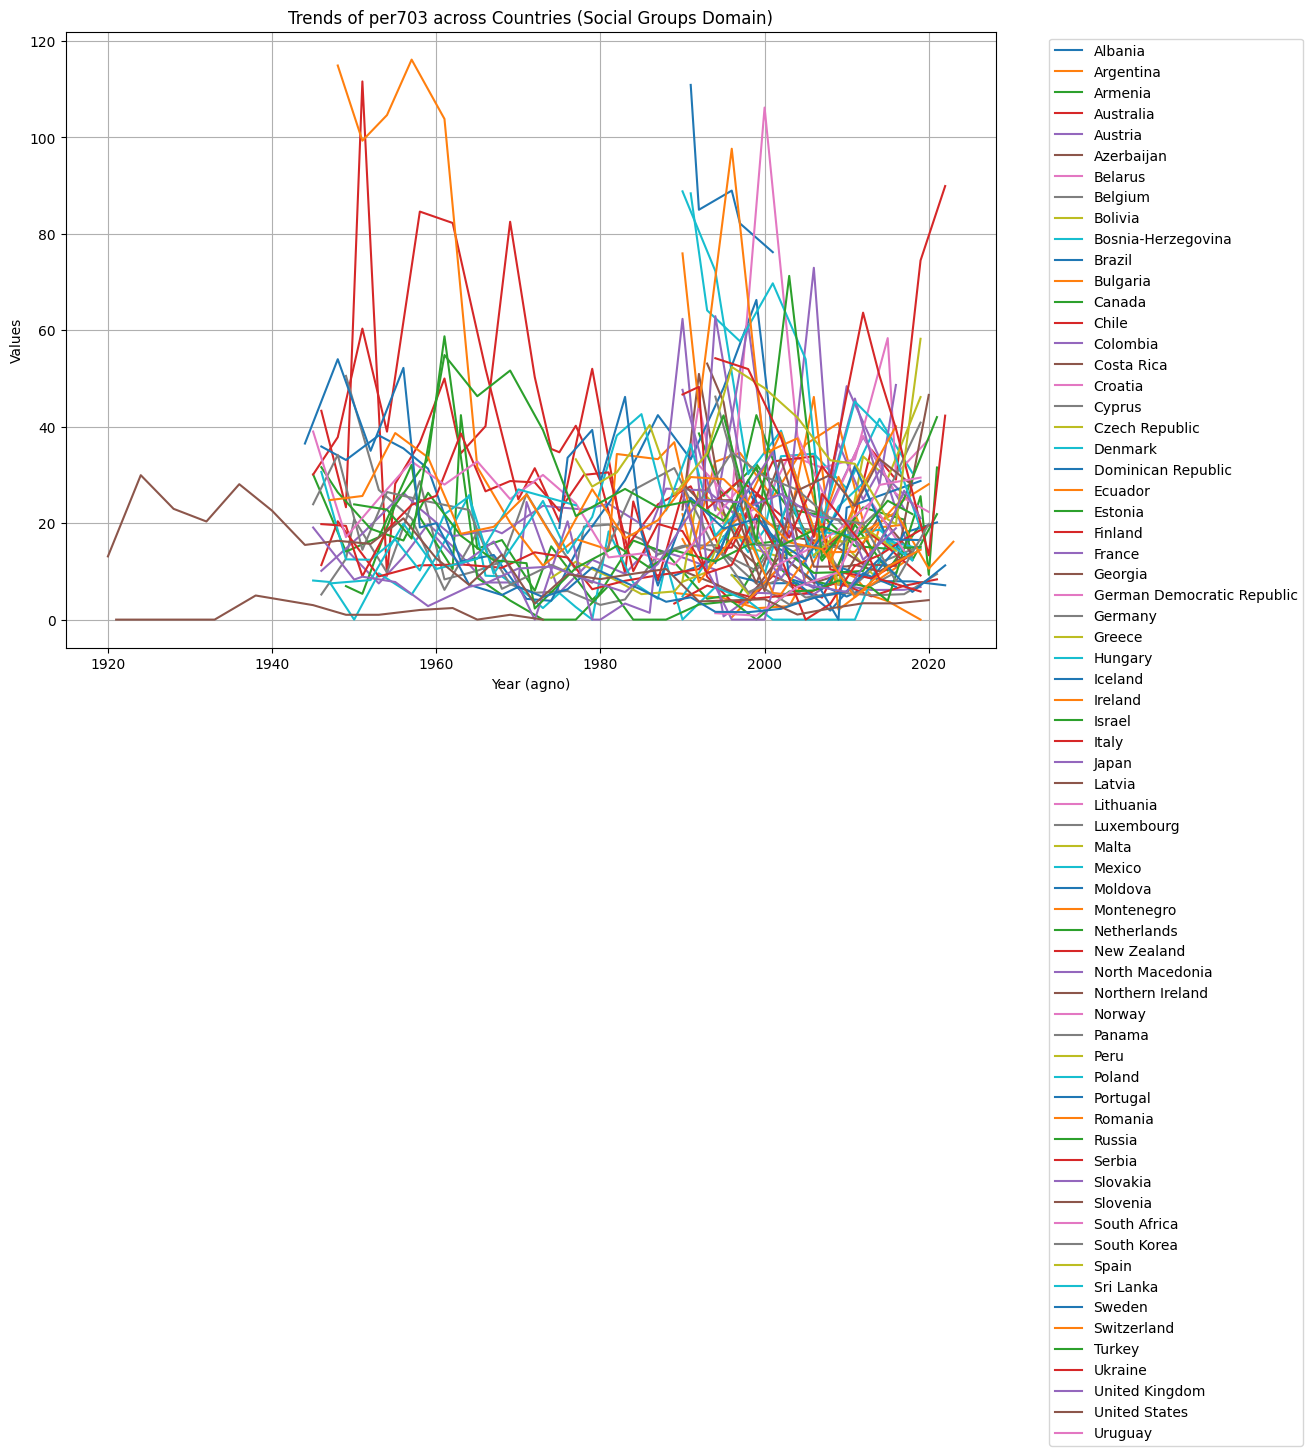

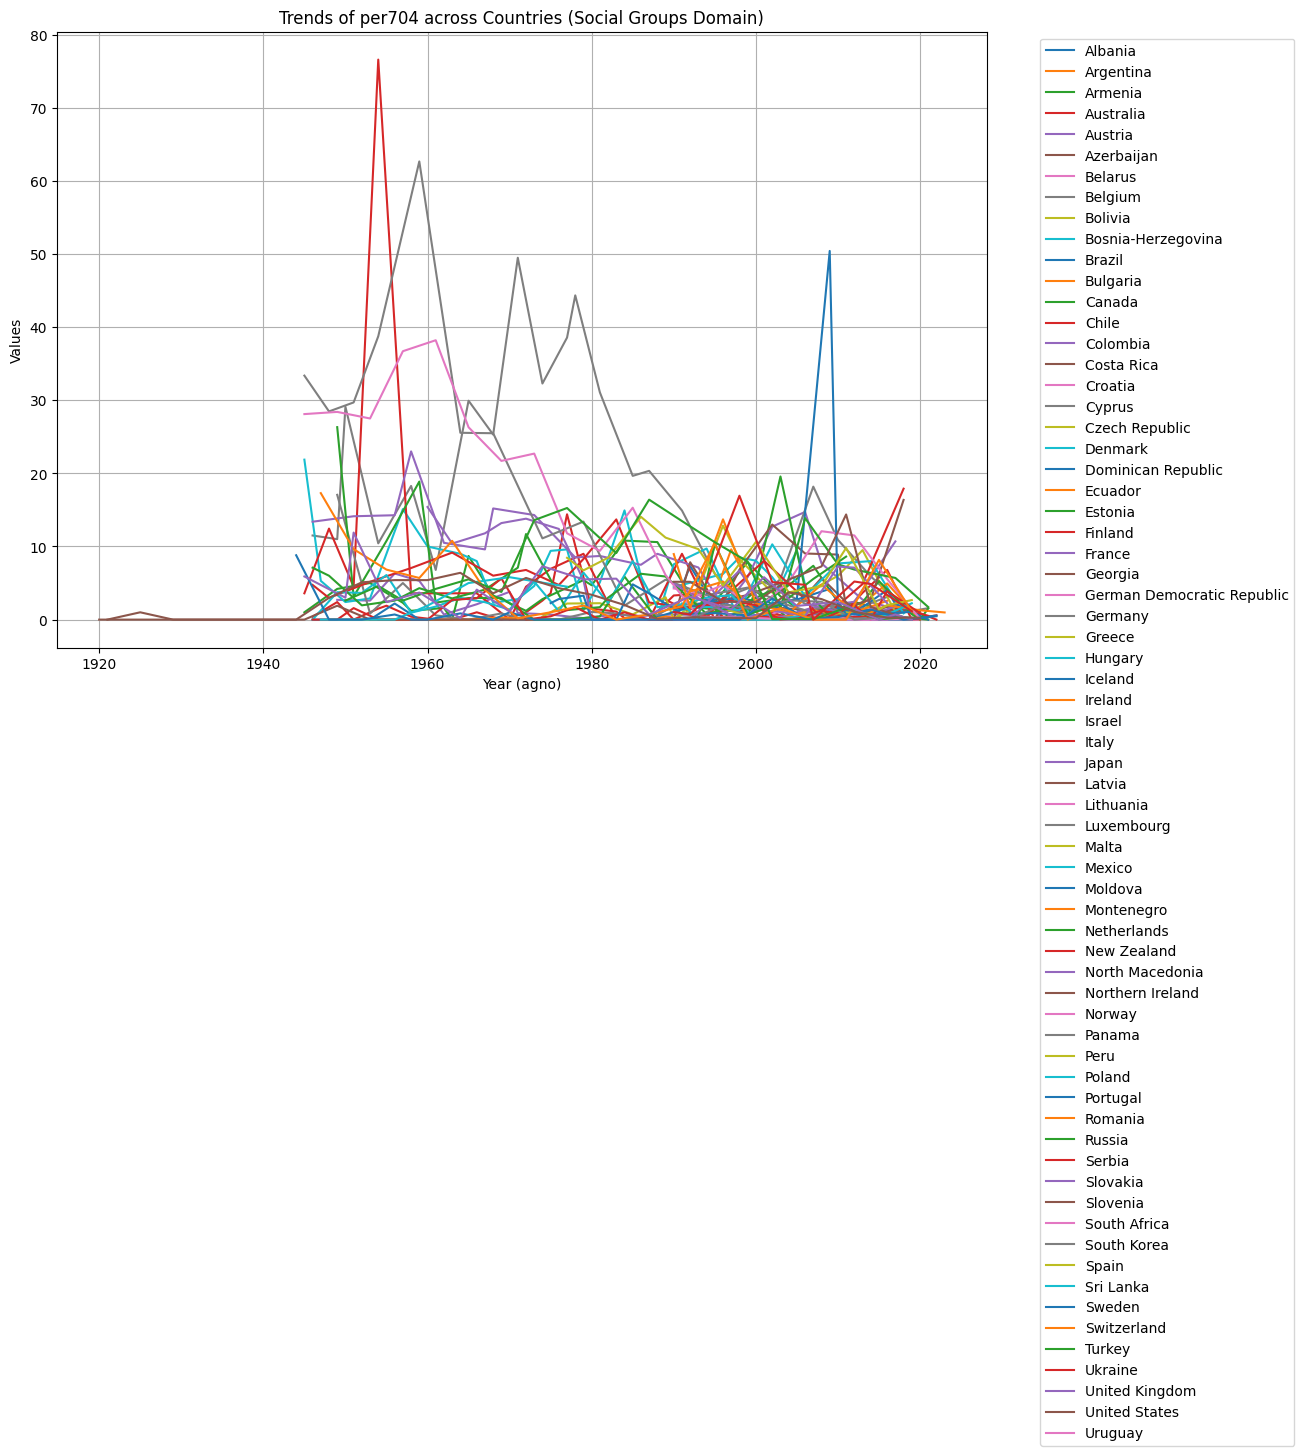

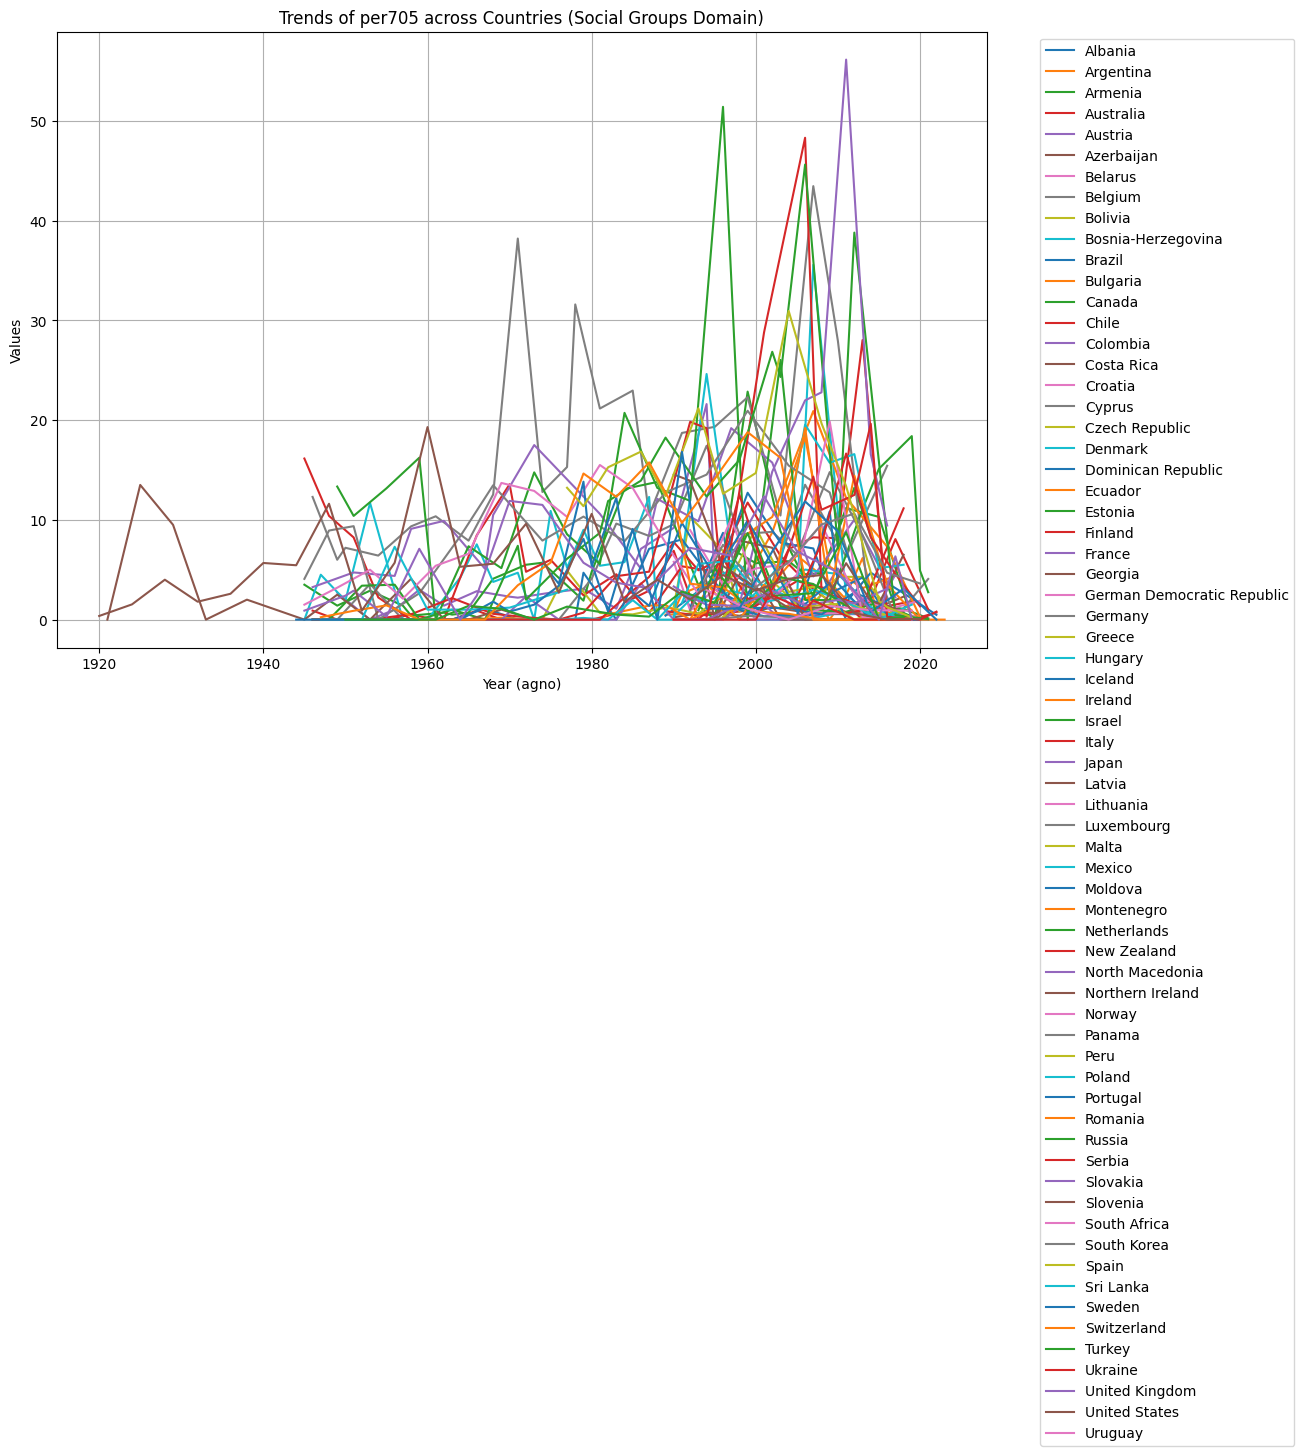

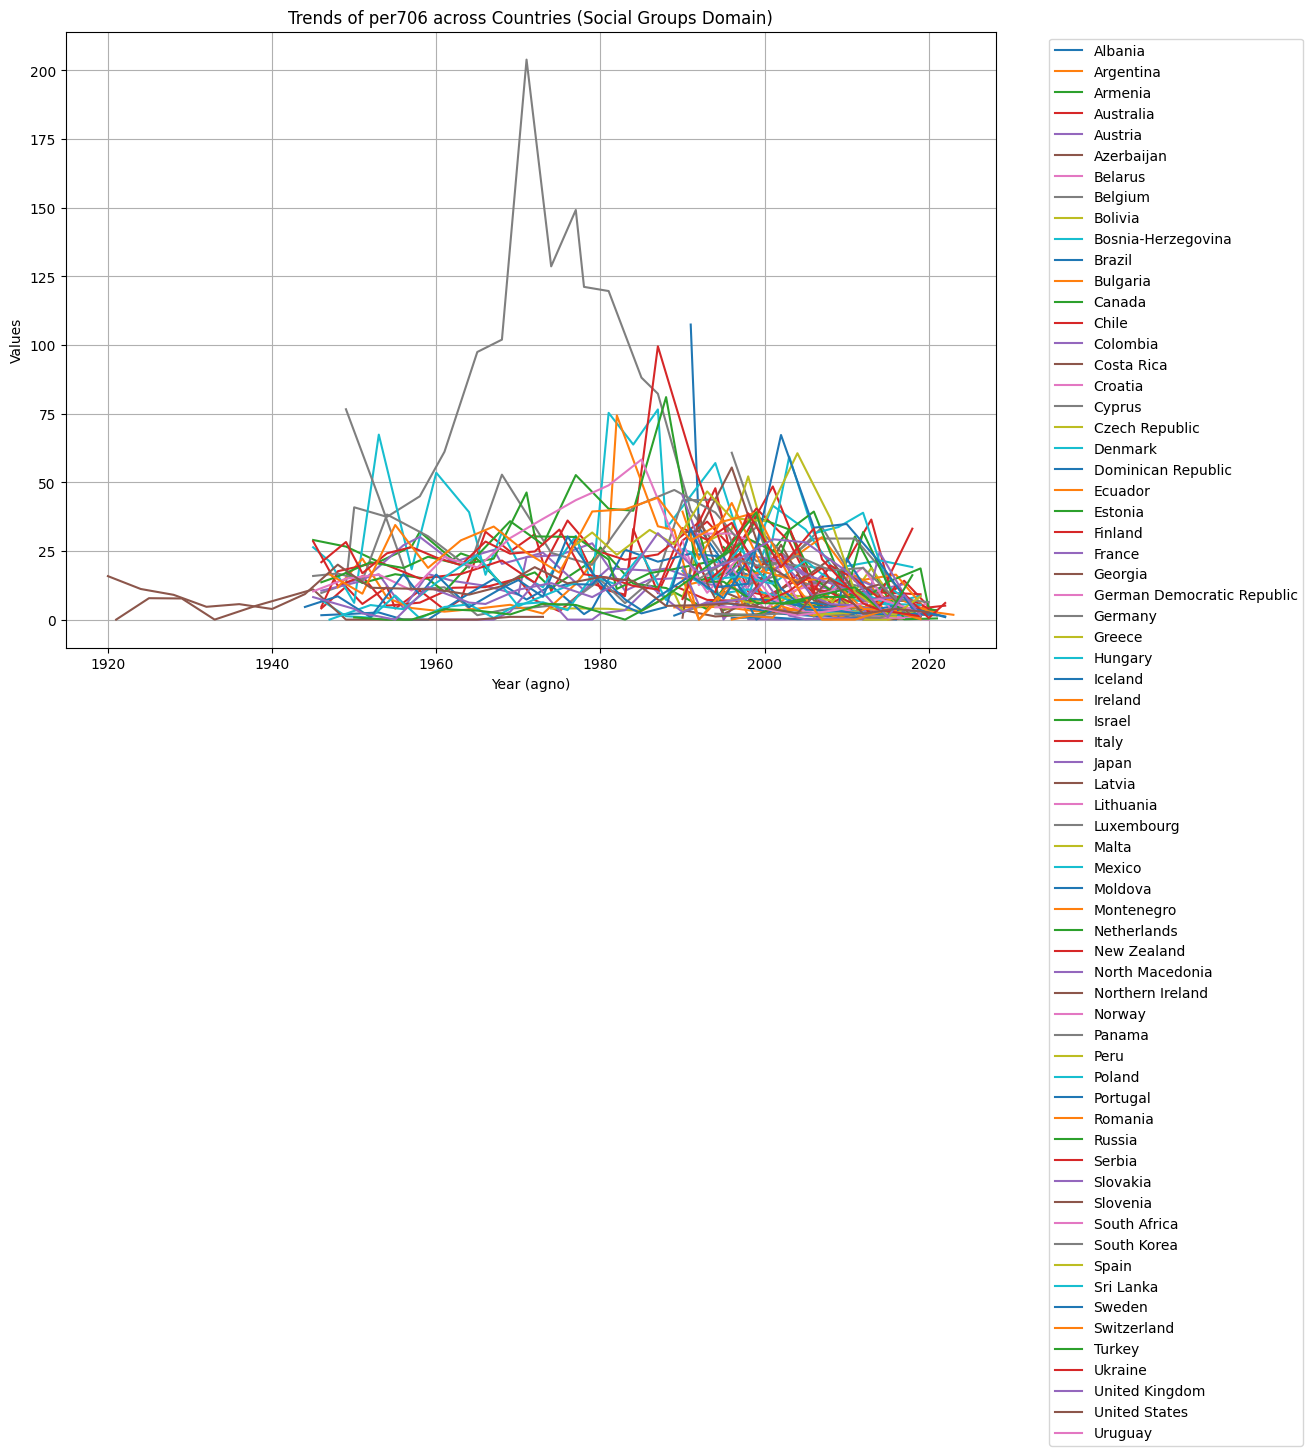

In [19]:
import matplotlib.pyplot as plt

# Identify all 'perxxxx' columns in df based on df_AD's 'Variable_per'
per_columns = df_AD['Variable_per'].tolist()

# Filter `perxxxx` columns that exist in `df`
valid_per_columns = [col for col in per_columns if col in df.columns]

# Ensure that `agno` column exists, or add a placeholder if not already in `df`
if 'agno' not in df.columns:
    df['agno'] = pd.to_datetime(df['edate'], errors='coerce').dt.year  # Create 'agno' from 'edate'

# Group by `countryname` and `agno` and sum the `perxxxx` columns
df_grouped = df.groupby(['countryname', 'agno'])[valid_per_columns].sum().reset_index()

# Filter `df_AD` to get all variables related to the domain "Social Groups"
social_groups_variables = df_AD[df_AD['Nombre_Dominio'] == "Social Groups"]['Variable_per'].tolist()

# Extract the relevant columns from `df_grouped` for analysis
social_groups_columns = [col for col in social_groups_variables if col in df_grouped.columns]

# Create a subset of `df_grouped` with only the columns related to "Social Groups"
df_social_groups = df_grouped[['countryname', 'agno'] + social_groups_columns]

# Plot each "Social Groups" variable trend over time by country
for col in social_groups_columns:
    plt.figure(figsize=(12, 8))
    
    for country in df_social_groups['countryname'].unique():
        country_data = df_social_groups[df_social_groups['countryname'] == country].sort_values(by='agno')
        plt.plot(country_data['agno'], country_data[col], label=country)
    
    plt.title(f"Trends of {col} across Countries (Social Groups Domain)")
    plt.xlabel('Year (agno)')
    plt.ylabel('Values')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

